In [ ]:
import requests
from PIL import Image
import numpy as np
import cv2

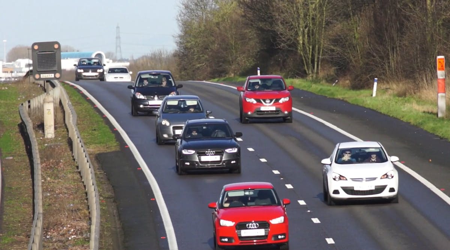

In [ ]:
image = Image.open(requests.get('https://images.pexels.com/videos/854671/free-video-854671.jpg?auto=compress&cs=tinysrgb&fit=crop&h=627&w=1200',stream=True).raw)
image = image.resize((450,250))
image_array = np.array(image)
image

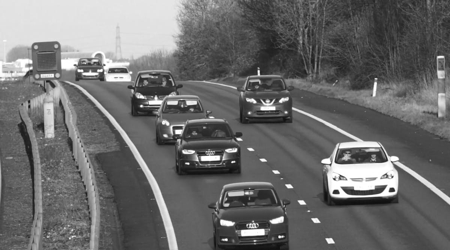

In [ ]:
grey = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

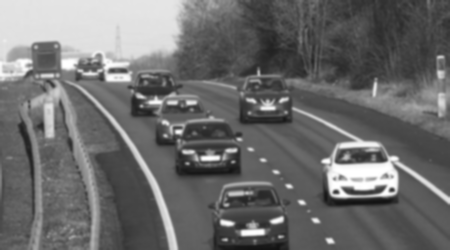

In [ ]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)
#removes noice

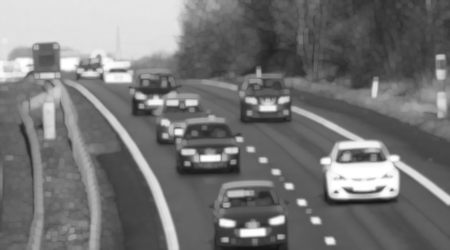

In [ ]:
dilate = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilate)


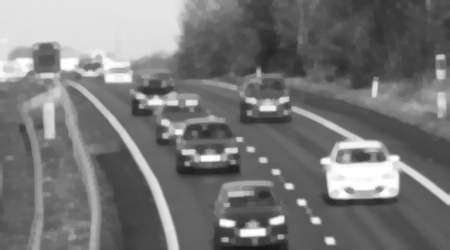

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [ ]:
car_cascade = 'cars.xml'
car = cv2.CascadeClassifier(car_cascade)
cars = car.detectMultiScale(closing,1.1,1)

6


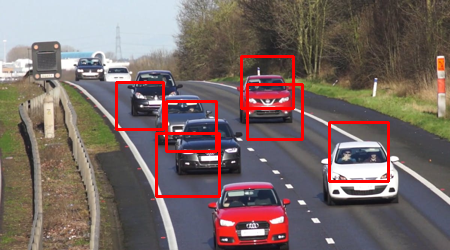

In [ ]:
count = 0
for(x,y,w,h ) in cars:
  cv2.rectangle(image_array,(x,y),(x+w,y+h),(255,0,0),2)
  count +=1
print(count)
Image.fromarray(image_array)

In [ ]:
cascade_src= 'cars.xml'
video = 'cars_video.mp4'

cap = cv2.VideoCapture(video)
car_cascade = cv2.CascadeClassifier(cascade_src)
result = cv2.VideoWriter('Result.mp4',cv2.VideoWriter_fourcc(*'DIVX'),24,(450,250))

In [ ]:
while True:
  ret,img = cap.read()
  if(type(img)==type(None)):
    break

  grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cars = car_cascade.detectMultiScale(grey,1.1,2)
  for(x,y,w,h ) in cars:
    cv2.rectangle(image_array,(x,y),(x+w,y+h),(255,0,0),2)
  result.write(img)
result.release()